In [1]:
import os
import lightgbm as lgb
import pandas as pd
import warnings
from matplotlib import pyplot as plt
import seaborn as sns

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
####################################################
############# Setear segun cada maquina ############
#os.chdir("C:/Users/herna/labo3_empresa3_repo/datasets")
os.chdir("C:/diego_tools/labo3/dataset")
####################################################

In [3]:
arch_min_max_prod = "emp3_min_max_prod.csv"
arch_mean_sd_prod = "emp3_mean_sd_prod.csv"

In [4]:
def desnormalizar_valor(valor,minimo,maximo):
    return (valor * (maximo-minimo)) + minimo

In [5]:
def error_rate(y, y_pred):
    df_calculo = GLOBAL_PRODUCT_IDS.copy()
    df_calculo["y"] = y
    df_calculo["y_pred"] = y_pred
    df_calculo["y_desnormalizado"]=df_calculo.apply(lambda row: desnormalizar_valor(row["y"],row["min"],row["max"]),axis=1)
    df_calculo["y_pred_desnormalizado"]=df_calculo.apply(lambda row: desnormalizar_valor(row["y_pred"],row["min"],row["max"]),axis=1)

    y = df_calculo.y_desnormalizado
    y_pred = df_calculo.y_pred_desnormalizado
    
    print("Y:", len(y))
    print("Y_PRED:",len(y_pred))
    
    dif_abs = sum(abs(y - y_pred))
    suma_real = sum(y)
    
    print("dif_abs:",dif_abs)
    print("suma_real:",suma_real)

    return round(100*dif_abs/suma_real,2)

def lgbm_error_rate(preds, train_data):
    labels = train_data.get_label()
    ret_val = error_rate(preds, labels)
    return 'ER', ret_val, False

In [6]:
def plot_lgb_importances(model, plot=False, num=10):
    gain = model.feature_importance('gain')
    feat_imp = pd.DataFrame({'feature': model.feature_name(),
                             'split': model.feature_importance('split'),
                             'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    if plot:
        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1)
        sns.barplot(x="gain", y="feature", data=feat_imp[0:25])
        plt.title('feature')
        plt.tight_layout()
        plt.show(block=True)
    else:
        print(feat_imp.head(num))
    return feat_imp

In [7]:
tipos_transf = ['sin_transf', 'norm', 'estand']

tipo_transf = tipos_transf[1]

df_min_max_prod = pd.read_csv(arch_min_max_prod)

In [8]:
df_sellout = pd.read_csv("emp3_sellout_product_train_" + tipo_transf + ".csv")

In [9]:
df_sellout.head()

,product_id,periodo,imputado,tn,cust_request_qty,plan_precios_cuidados,periodo_fecha,mes,cat1,cat2,...,catastrofe,accion,dif_tn_req_porc,tn_lag_1,tn_lag_2,tn_lag_3,tn_mas_2,tn_delta_1,tn_delta_2,tn_delta_3
0,20001,201701,0,0.091342,479.0,0.0,2017-01-01,1,HC,ROPA LAVADO,...,False,train,0.003151,NaN,NaN,NaN,0.337528,NaN,NaN,NaN
1,20001,201702,0,0.000000,432.0,0.0,2017-02-01,2,HC,ROPA LAVADO,...,False,train,0.042827,0.091342,NaN,NaN,0.181638,-0.091342,NaN,NaN
2,20001,201703,0,0.337528,509.0,0.0,2017-03-01,3,HC,ROPA LAVADO,...,False,train,0.020582,0.000000,0.091342,NaN,0.470340,0.337528,0.246186,NaN
3,20001,201704,0,0.181638,279.0,0.0,2017-04-01,4,HC,ROPA LAVADO,...,False,train,0.055592,0.337528,0.000000,0.091342,0.482272,-0.155890,0.181638,0.090296
4,20001,201705,0,0.470340,701.0,0.0,2017-05-01,5,HC,ROPA LAVADO,...,False,train,0.031269,0.181638,0.337528,0.000000,0.155397,0.288702,0.132812,0.470340


In [10]:
df_sellout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30825 entries, 0 to 30824
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   product_id                 30825 non-null  int64  
 1   periodo                    30825 non-null  int64  
 2   imputado                   30825 non-null  int64  
 3   tn                         30825 non-null  float64
 4   cust_request_qty           30825 non-null  float64
 5   plan_precios_cuidados      30825 non-null  float64
 6   periodo_fecha              30825 non-null  object 
 7   mes                        30825 non-null  int64  
 8   cat1                       30825 non-null  object 
 9   cat2                       30825 non-null  object 
 10  cat3                       30825 non-null  object 
 11  brand                      30825 non-null  object 
 12  sku_size                   30825 non-null  float64
 13  producto_estrella          30825 non-null  flo

In [11]:
df_sellout.isna().sum()

product_id                      0
periodo                         0
imputado                        0
tn                              0
cust_request_qty                0
plan_precios_cuidados           0
periodo_fecha                   0
mes                             0
cat1                            0
cat2                            0
cat3                            0
brand                           0
sku_size                        0
producto_estrella               0
temp_media                      0
temp_max_media                  0
temp_min_media                  0
IPC                             0
promedio_mens_dolar_venta       0
catastrofe                      0
accion                          0
dif_tn_req_porc                 0
tn_lag_1                     1233
tn_lag_2                     2466
tn_lag_3                     3699
tn_mas_2                        0
tn_delta_1                   1233
tn_delta_2                   2466
tn_delta_3                   3699
dtype: int64

In [12]:
#Transformo todas las categoricas
categories = ["plan_precios_cuidados","cat1","cat2","cat3","product_id"]

for c in categories: 
    df_sellout[c] = df_sellout[c].astype("category")   
    
#Elimino otras variables
df_sellout = df_sellout.drop(columns=["brand","periodo_fecha"])

In [13]:
df_sellout.periodo.head()

0    201701
1    201702
2    201703
3    201704
4    201705
Name: periodo, dtype: int64

In [14]:
df_train = df_sellout[df_sellout.accion == "train"]
df_holdout = df_sellout[df_sellout.accion == "holdout"]

df_train.periodo.unique(),df_holdout.periodo.unique()

(array([201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
        201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
        201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812],
       dtype=int64),
 array([201902], dtype=int64))

In [15]:
X_train = df_train.drop(columns=["tn_mas_2","periodo","accion"], axis=1)
X_holdout = df_holdout.drop(columns=["tn_mas_2","periodo","accion"], axis=1)

y_train = df_train.tn_mas_2
y_holdout = df_holdout.tn_mas_2

y_train.shape, X_train.shape, y_holdout.shape, X_holdout.shape

((29592,), (29592, 24), (1233,), (1233, 24))

In [16]:
############ DEFINO Vector Global de Productos #################
GLOBAL_PRODUCT_IDS = pd.DataFrame(data={"product_id":X_holdout.product_id})
GLOBAL_PRODUCT_IDS = GLOBAL_PRODUCT_IDS.merge(df_min_max_prod,how="inner",on="product_id")
GLOBAL_PRODUCT_IDS

,product_id,max,min
0,20001,2295.19832,798.01620
1,20002,1766.81068,505.88633
2,20003,1958.59845,525.82591
3,20004,1268.21209,415.52538
4,20005,1247.88880,329.42894
...,...,...,...
1228,21295,0.00699,0.00000
1229,21296,0.00651,0.00000
1230,21297,0.00579,0.00000
1231,21298,0.00573,0.00000


In [17]:
lgb_params = {'num_leaves': 50,
              'learning_rate': 0.05,
              'feature_fraction': 0.6,
              'n_estimators': 100,
              'max_depth': -1,
              'verbose': 0,
              'num_boost_round': 10000,
              'early_stopping_rounds': 200,
              'nthread': -1}

In [18]:
cols = X_train.columns.tolist()

lgb_train = lgb.Dataset(data=X_train, label=y_train, feature_name=cols)
lgb_holdout = lgb.Dataset(data=X_holdout, label=y_holdout, reference=lgb_train, feature_name=cols)

In [19]:
model = lgb.train(lgb_params, lgb_train,
                  valid_sets=[lgb_holdout],
                  num_boost_round=lgb_params['num_boost_round'],
                  early_stopping_rounds=lgb_params['early_stopping_rounds'],
                  feval=lgbm_error_rate,
                  verbose_eval=100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003348 seconds.
You can set `force_col_wise=true` to remove the overhead.
Y: 1233
Y_PRED: 1233
dif_abs: 13342.97455227266
suma_real: 33382.20763672804
Training until validation scores don't improve for 200 rounds
Y: 1233
Y_PRED: 1233
dif_abs: 13121.440401871845
suma_real: 33295.64266541535
Y: 1233
Y_PRED: 1233
dif_abs: 13012.434152709817
suma_real: 33326.54699571541
Y: 1233
Y_PRED: 1233
dif_abs: 12834.337771529825
suma_real: 33258.890592006246
Y: 1233
Y_PRED: 1233
dif_abs: 12639.342402385193
suma_real: 33177.255970807804
Y: 1233
Y_PRED: 1233
dif_abs: 12475.661550519604
suma_real: 33120.26944060715
Y: 1233
Y_PRED: 1233
dif_abs: 12315.471203833891
suma_real: 33052.767104445214
Y: 1233
Y_PRED: 1233
dif_abs: 12212.337792203187
suma_real: 33007.39930968988
Y: 1233
Y_PRED: 1233
dif_abs: 12062.999604070565
suma_real: 32951.76499188448
Y: 1233
Y_PRED: 1233
dif_abs: 11919.98943536513
suma_real: 32885.7408

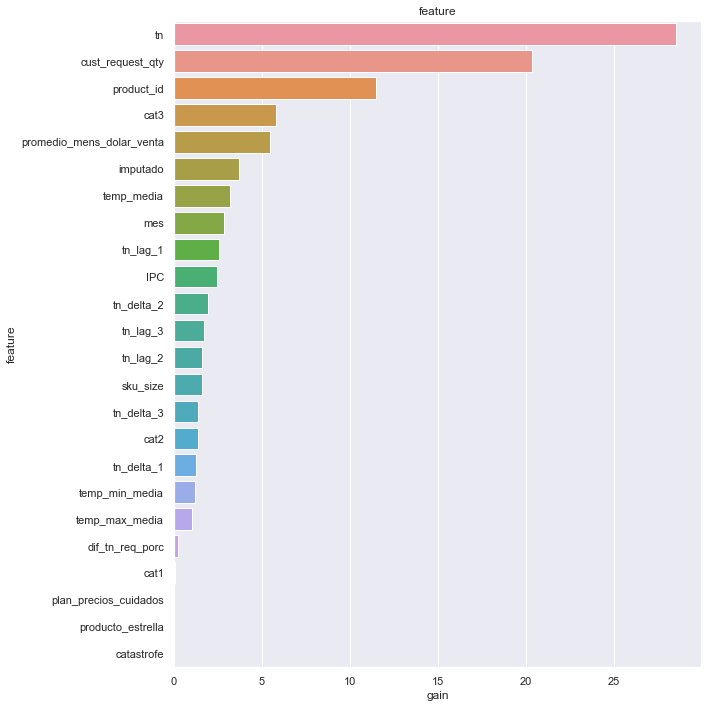

,feature,split,gain
2,tn,1313,28.533835
3,cust_request_qty,1193,20.350835
0,product_id,2988,11.485878
8,cat3,1261,5.804989
15,promedio_mens_dolar_venta,1051,5.485526
1,imputado,102,3.721118
11,temp_media,752,3.209033
5,mes,717,2.844988
18,tn_lag_1,1204,2.592991
14,IPC,742,2.477046


In [20]:
plot_lgb_importances(model, num=30, plot=True)

In [21]:
y_pred = model.predict(X_holdout)

In [37]:
error_rate(np.array(y_holdout),y_pred)

Y: 1233
Y_PRED: 1233
dif_abs: 9139.708725123399
suma_real: 33763.86541000003


27.07

In [24]:
len(X_holdout)

1233

In [25]:
print(X_holdout.shape)
df_prediction = X_holdout
df_prediction["tn_target"]=y_holdout
df_prediction["tn_predicted"]=y_pred
print(df_prediction.shape)

(1233, 24)
(1233, 26)


In [26]:
df_prediction.to_csv("emp3_lightgbm_prediction.csv", index=False)

In [38]:
df_calculo = GLOBAL_PRODUCT_IDS.copy()
df_calculo["y"] = np.array(y_holdout)
df_calculo["y_desnormalizado"]=df_calculo.apply(lambda row: desnormalizar_valor(row["y"],row["min"],row["max"]),axis=1)
df_calculo

,product_id,max,min,y,y_desnormalizado
0,20001,2295.19832,798.01620,0.567481,1647.63848
1,20002,1766.81068,505.88633,0.619971,1287.62346
2,20003,1958.59845,525.82591,0.027577,565.33774
3,20004,1268.21209,415.52538,0.060026,466.70901
4,20005,1247.88880,329.42894,0.321810,624.99880
...,...,...,...,...,...
1228,21295,0.00699,0.00000,0.000000,0.00000
1229,21296,0.00651,0.00000,0.000000,0.00000
1230,21297,0.00579,0.00000,0.000000,0.00000
1231,21298,0.00573,0.00000,0.000000,0.00000


In [40]:
df_calculo.y_desnormalizado.sum()

33763.86541

In [ ]:
import numpy as np


array([0.56748092, 0.61997148, 0.02757718, ..., 0.        , 0.        ,
       0.        ])

In [45]:
y=(1648-798.01620)/(2295.19832-798.01620)
y=0.567481
y*(2295.19832-798.01620)+798.01620

1647.63860663972